In [1]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import random 
import tensorflow as tf
import numpy as np
import math

/Users/mohammfa/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
""""Def Generate neutrino 
Random origin (x,y)
Random direction (dx, dy) or (one angles)
Random energy (0 to 1) or (10 to 300 nanoseconds)
Random time
(make code adjustable)
We want to know how fast the neutrino is"""
def generateNeutrino():
    x = random.uniform(0,10)
    y = 10;
    angle = random.vonmisesvariate(0, 0)
    energy = random.random();
    time = random.randint(10,300)
    x = round(x,3)
    y = round(y,3)
    angle = round(angle,3)
    energy = round(energy,3)
    time = round(time,3)


    return x, y, angle, energy, time
    

In [13]:
def generateSignal(x,y,angle,energy,time):
    nodes = 10
    x_arr = np.linspace(0,nodes,nodes + 1)
    y_arr = np.linspace(0,nodes,nodes + 1)
    #10 by 10 grid which is the VICE CUBE
    
    #using MeshGrid
    mesh_x, mesh_y = np.meshgrid(x_arr, y_arr)
    mesh_x = np.round(mesh_x,3)
    mesh_y = np.round(mesh_y,3)

    #find distance of each sensor to the origion using euclidean distance formula
    x_sq = mesh_x - x
    y_sq = mesh_y - y
    x_sq = np.power(x_sq,2)
    y_sq = np.power(y_sq,2)
    distance = np.sqrt(x_sq + y_sq)
    distance = np.round(distance,1)
    
    #find charge
    #charge formula: C = (maxDistance - distance_to_each_node)^2 / maxDistance
    maxDistance = math.sqrt((nodes * nodes) + (nodes * nodes))
    charge = np.power((maxDistance - distance),2) / maxDistance
    charge = np.round(charge,1);
    
    
    #based on the angle and the origin create a line (data fit) that would simulate a neutrino path
    return mesh_x, mesh_y, distance, charge

x
 [[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
y
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
 [ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
 [ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
 [ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
 [ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
 [ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
 [ 9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.]
 [10. 

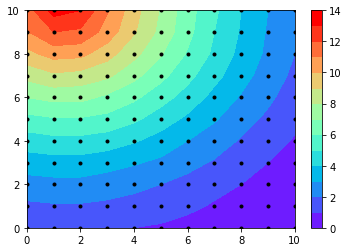

x y angle energy time
1.404 10 2.975 0.126 69
distance
 [[10.1 10.  10.  10.1 10.3 10.6 11.  11.5 12.  12.6 13.2]
 [ 9.1  9.   9.   9.1  9.4  9.7 10.1 10.6 11.2 11.8 12.4]
 [ 8.1  8.   8.   8.2  8.4  8.8  9.2  9.8 10.4 11.  11.7]
 [ 7.1  7.   7.   7.2  7.5  7.9  8.4  9.   9.6 10.3 11.1]
 [ 6.2  6.   6.   6.2  6.5  7.   7.6  8.2  8.9  9.7 10.5]
 [ 5.2  5.   5.   5.2  5.6  6.2  6.8  7.5  8.3  9.1  9.9]
 [ 4.2  4.   4.   4.3  4.8  5.4  6.1  6.9  7.7  8.6  9.5]
 [ 3.3  3.   3.1  3.4  4.   4.7  5.5  6.3  7.2  8.2  9.1]
 [ 2.4  2.   2.1  2.6  3.3  4.1  5.   5.9  6.9  7.9  8.8]
 [ 1.7  1.1  1.2  1.9  2.8  3.7  4.7  5.7  6.7  7.7  8.7]
 [ 1.4  0.4  0.6  1.6  2.6  3.6  4.6  5.6  6.6  7.6  8.6]]
charge
 [[ 1.2  1.2  1.2  1.2  1.   0.9  0.7  0.5  0.3  0.2  0.1]
 [ 1.8  1.9  1.9  1.8  1.6  1.4  1.2  0.9  0.6  0.4  0.2]
 [ 2.6  2.7  2.7  2.5  2.3  2.   1.7  1.3  1.   0.7  0.4]
 [ 3.5  3.6  3.6  3.4  3.1  2.8  2.3  1.9  1.5  1.   0.7]
 [ 4.5  4.7  4.7  4.5  4.1  3.6  3.   2.5  1.9  1.4  0.9]
 [ 5.7 

In [14]:
if __name__== "__main__":
    x,y,angle,energy,time = generateNeutrino();
    mesh_x, mesh_y, distance, charge = generateSignal(x,y,angle,energy,time)
    print("x\n", mesh_x)
    print("y\n", mesh_y)

    plt.plot(mesh_x,mesh_y, marker='.', color='k', linestyle='none')
    
    
    CS = plt.contourf(mesh_x, mesh_y,charge, 15, cmap=plt.cm.rainbow,
                  vmax=charge.max(), vmin=0)
    plt.colorbar()  
    plt.show()

    print("x y angle energy time")
    print(x,y,angle,energy,time)
    
    print("distance\n", distance)
    print("charge\n", charge)

